In [1]:
import numpy as np
from keras import Input
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense
from keras.models import Model
from keras.utils import to_categorical
from plot_util import show_model

Using TensorFlow backend.


In [2]:
VOCAB_SIZE = 50000
NUM_INCOME_GROUPS = 10

In [3]:
posts_input = Input(shape=(None, ))
embedded_posts = Embedding(VOCAB_SIZE, 256)(posts_input)
x = Conv1D(128, 5, activation='relu', padding='same')(embedded_posts)
x = MaxPooling1D(5)(x)
x = Conv1D(256, 5, activation='relu', padding='same')(x)
x = Conv1D(256, 5, activation='relu', padding='same')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(256, 5, activation='relu', padding='same')(x)
x = Conv1D(256, 5, activation='relu', padding='same')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)

age_prediction = Dense(1, name='age')(x)
income_prediction = Dense(NUM_INCOME_GROUPS, activation='softmax', name='income')(x)
gender_prediction = Dense(1, activation='sigmoid', name='gender')(x)

model = Model(posts_input, [age_prediction, income_prediction, gender_prediction])

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
# model.compile(optimizer='rmsprop', loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'])

model.compile(
    optimizer='rmsprop', 
    loss={'age': 'mse', 'income': 'categorical_crossentropy', 'gender': 'binary_crossentropy'}
)

# model.compile(
#     optimizer='rmsprop', 
#     loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'],
#     loss_weights=[0.25, 1., 10.]
# )

# model.compile(
#     optimizer='rmsprop', 
#     loss={'age': 'mse', 'income': 'categorical_crossentropy', 'gender': 'binary_crossentropy'},
#     loss_weights={'age': 0.25, 'income': 1., 'gender': 10.}
# )

In [5]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 256)    12800000    input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, None, 128)    163968      embedding_1[0][0]                
__________________________________________________________________________________________________
max_pooling1d_1 (MaxPooling1D)  (None, None, 128)    0           conv1d_1[0][0]                   
__________________________________________________________________________________________________
conv1d_2 (

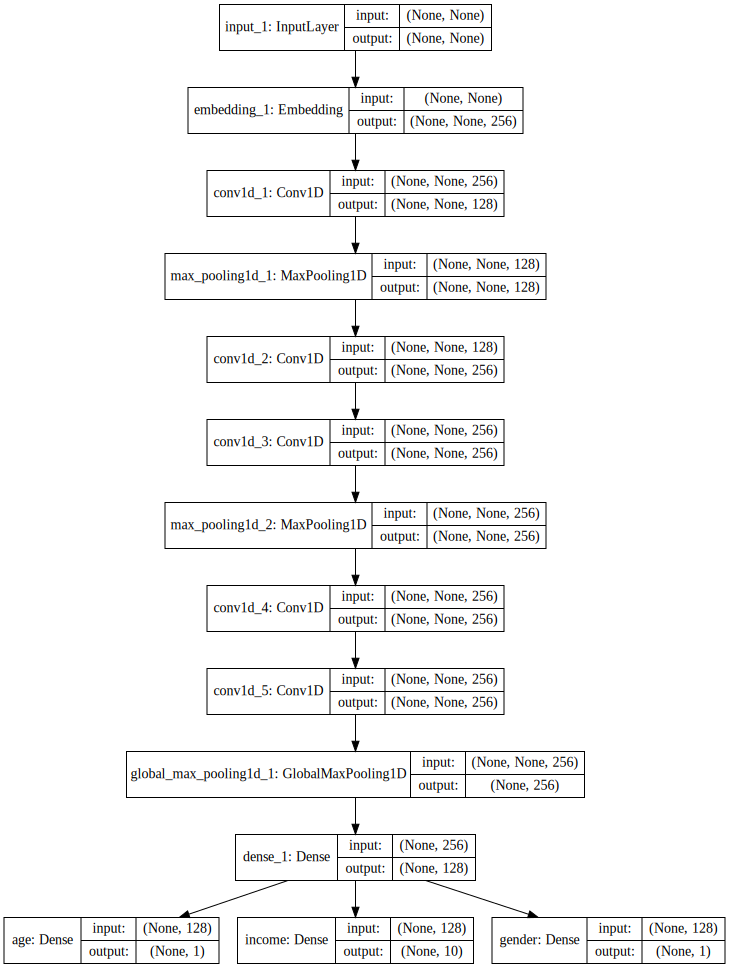

In [6]:
show_model(model)

In [7]:
NUM_SAMPLES = 1000
MAXLEN = 100

posts = np.random.randint(1, VOCAB_SIZE, size=(NUM_SAMPLES, MAXLEN))

age_targets = np.random.randint(0, 100, size=(NUM_SAMPLES, 1))
income_targets = np.random.randint(0, NUM_INCOME_GROUPS, size=(NUM_SAMPLES, 1))
income_targets = to_categorical(income_targets, NUM_INCOME_GROUPS)
gender_targets = np.random.randint(0, 2, size=(NUM_SAMPLES, 1))

In [8]:
# history = model.fit(posts, [age_targets, income_targets, gender_targets], epochs=10, batch_size=64, verbose=2)

history = model.fit(
    posts, {'age': age_targets, 'income': income_targets, 'gender': gender_targets}, 
    epochs=5, batch_size=64, verbose=2
)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/5
 - 2s - loss: 2341.7908 - age_loss: 2336.1008 - income_loss: 4.5031 - gender_loss: 1.1867
Epoch 2/5
 - 0s - loss: 540.9723 - age_loss: 537.4129 - income_loss: 2.8633 - gender_loss: 0.6960
Epoch 3/5
 - 0s - loss: 323.8502 - age_loss: 320.7516 - income_loss: 2.3996 - gender_loss: 0.6990
Epoch 4/5
 - 0s - loss: 486.3697 - age_loss: 483.2746 - income_loss: 2.3859 - gender_loss: 0.7091
Epoch 5/5
 - 0s - loss: 362.7803 - age_loss: 359.6473 - income_loss: 2.4120 - gender_loss: 0.7210
